In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
from matplotlib_venn import venn3

In [2]:

# Load data
data_ec_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/pred_metagenome_contrib.tsv', sep='\t', dtype=str)
data_ec_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/pred_metagenome_unstrat.tsv', sep='\t', dtype=str)
data_weighted_nsti = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/weighted_nsti.tsv', sep='\t', dtype=str)
data_asv_abun_norm = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/seqtab_norm.tsv', sep='\t', dtype=str)
data_ko_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/KO_metagenome_out/pred_metagenome_contrib.tsv', sep='\t', dtype=str)
data_ko_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/KO_metagenome_out/pred_metagenome_unstrat.tsv', sep='\t', dtype=str)
data_path_abun_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/pathways_out/path_abun_contrib.tsv', sep='\t', dtype=str)
data_path_abun_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/pathways_out/path_abun_unstrat.tsv', sep='\t', dtype=str)


In [5]:
# Filter to three samples (barcode01 = Køng_SBP_silaged, barcode25 = NL_SBP_silaged, barcode49 = Køng_PR1)
samples = ['barcode01', 'barcode25', 'barcode49']
samples_unstrat = ['function', 'barcode01', 'barcode25', 'barcode49']
data_ec_contrib_filtered = data_ec_contrib[data_ec_contrib["sample"].isin(samples)]
data_ec_unstrat_filtered = data_ec_unstrat[samples_unstrat]
data_weighted_nsti_filtered = data_weighted_nsti[data_weighted_nsti["sample"].isin(samples)]
data_asv_abun_norm_filtered = data_asv_abun_norm[samples]
data_ko_contrib_filtered = data_ko_contrib[data_ko_contrib["sample"].isin(samples)]
data_ko_unstrat_filtered = data_ko_unstrat[samples_unstrat]
data_path_abun_contrib_filtered = data_path_abun_contrib[data_path_abun_contrib["sample"].isin(samples)]
data_path_abun_unstrat_filtered = data_path_abun_unstrat[samples_unstrat]

KeyError: "['function'] not in index"

In [4]:
# Save filtered data to new files
data_ec_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ec_contrib_filtered.tsv', sep='\t', index=False)
data_ec_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ec_unstrat_filtered.tsv', sep='\t', index=False)
data_weighted_nsti_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/weighted_nsti_filtered.tsv', sep='\t', index=False)
data_asv_abun_norm_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/asv_abun_norm_filtered.tsv', sep='\t', index=False)
data_ko_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ko_contrib_filtered.tsv', sep='\t', index=False)
data_ko_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ko_unstrat_filtered.tsv', sep='\t', index=False)
data_path_abun_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/path_abun_contrib_filtered.tsv', sep='\t', index=False)
data_path_abun_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/path_abun_unstrat_filtered.tsv', sep='\t', index=False)


In [12]:
print(data_ec_unstrat_filtered.head(10))

       function           barcode01          barcode25           barcode49
0    EC:1.1.1.1  129040.04000000001           52015.38   76809.98000000001
1  EC:1.1.1.100  259263.25999999998           38287.52  172428.02999999997
2  EC:1.1.1.102                 0.0                0.0                 0.0
3  EC:1.1.1.103             1218.96             521.35              1329.5
4  EC:1.1.1.105                8.42              25.91                 0.0
5  EC:1.1.1.107                 0.0                0.0                 0.0
6  EC:1.1.1.108             1715.92             100.24               38.25
7   EC:1.1.1.11                99.0              67.81                 4.0
8  EC:1.1.1.122              409.24             404.37               41.33
9  EC:1.1.1.125             6117.92  6903.899999999999  3307.4900000000002


/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

<Figure size 800x500 with 0 Axes>

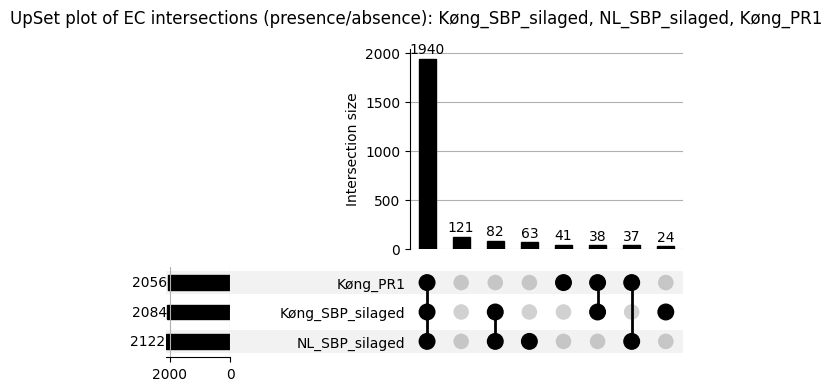

In [10]:
############################
###    EC UPSET PLOT     ###
############################

# input
sample_cols_ec = ['barcode01', 'barcode25', 'barcode49']
cols = ["function"] + sample_cols_ec
presence_threshold = 0.0

sample_name_map = {
    'barcode01': 'Køng_SBP_silaged',
    'barcode25': 'NL_SBP_silaged',
    'barcode49': 'Køng_PR1'
}

# Rename the columns
data_ec_unstrat_filtered = data_ec_unstrat_filtered.rename(columns=sample_name_map)

# Update column lists to match the new names
sample_cols_ec = list(sample_name_map.values())
cols = ["function"] + sample_cols_ec

data_ec_unstrat_filtered = data_ec_unstrat_filtered[cols].copy()
for c in sample_cols_ec:
    data_ec_unstrat_filtered[c] = pd.to_numeric(data_ec_unstrat_filtered[c], errors="coerce").fillna(0.0)

# Presence/absence matrix
bin_data_ec_unstrat_filtered = data_ec_unstrat_filtered.copy()
for c in sample_cols_ec:
    bin_data_ec_unstrat_filtered[c] = (bin_data_ec_unstrat_filtered[c] > presence_threshold).astype(int)

# Dictionary of sets
sets = {s: set(bin_data_ec_unstrat_filtered.loc[bin_data_ec_unstrat_filtered[s] == 1, "function"]) for s in sample_cols_ec}

# UpSet plot
ind = (bin_data_ec_unstrat_filtered.set_index("function")[sample_cols_ec] == 1)
data = from_indicators(ind.columns, ind)

plt.figure(figsize=(8,5))
UpSet(data, show_counts=True, sort_by="cardinality").plot()
plt.suptitle("UpSet plot of EC intersections (presence/absence): Køng_SBP_silaged, NL_SBP_silaged, Køng_PR1")
plt.tight_layout()
plt.show()

/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

<Figure size 800x500 with 0 Axes>

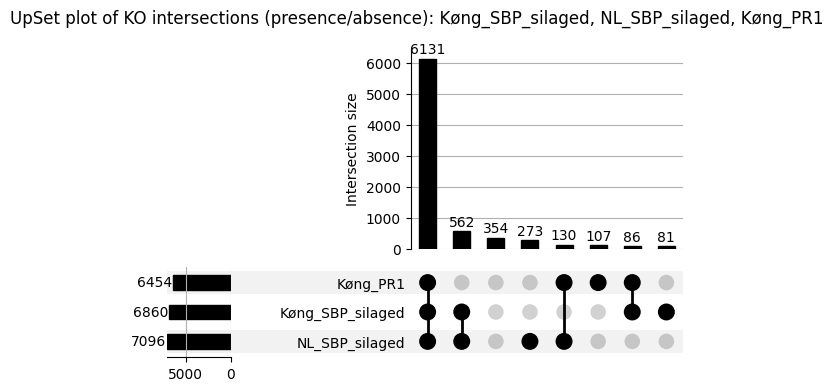

In [ ]:
############################
###    KO UPSET PLOT     ###
############################

# input
sample_cols_ko = ['barcode01', 'barcode25', 'barcode49']
cols = ["function"] + sample_cols_ko
presence_threshold = 0.0

sample_name_map = {
    'barcode01': 'Køng_SBP_silaged',
    'barcode25': 'NL_SBP_silaged',
    'barcode49': 'Køng_PR1'
}

# Rename the columns
data_ko_unstrat_filtered = data_ko_unstrat_filtered.rename(columns=sample_name_map)

# Update column lists to match the new names
sample_cols_ko = list(sample_name_map.values())
cols = ["function"] + sample_cols_ko

data_ko_unstrat_filtered = data_ko_unstrat_filtered[cols].copy()
for c in sample_cols_ko:
    data_ko_unstrat_filtered[c] = pd.to_numeric(data_ko_unstrat_filtered[c], errors="coerce").fillna(0.0)

# Presence/absence matrix
bin_data_ko_unstrat_filtered = data_ko_unstrat_filtered.copy()
for c in sample_cols_ko:
    bin_data_ko_unstrat_filtered[c] = (bin_data_ko_unstrat_filtered[c] > presence_threshold).astype(int)

# Dictionary of sets
sets = {s: set(bin_data_ko_unstrat_filtered.loc[bin_data_ko_unstrat_filtered[s] == 1, "function"]) for s in sample_cols_ko}

# UpSet plot
ind = (bin_data_ko_unstrat_filtered.set_index("function")[sample_cols_ko] == 1)
data = from_indicators(ind.columns, ind)

plt.figure(figsize=(8,5))
UpSet(data, show_counts=True, sort_by="cardinality").plot()
plt.suptitle("UpSet plot of KO intersections (presence/absence): Køng_SBP_silaged, NL_SBP_silaged, Køng_PR1")
plt.tight_layout()
plt.show()